# Byggingagreining á gervitunglamyndum
Nathan HK

In [55]:
from io import BytesIO
import math
import matplotlib.pyplot as plt
from PIL import Image
from pyrosm import OSM
from pyrosm import get_data
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time

## Inngangsorð
Við viljum þjálfa gervigreindarlíkan til að greina byggingar á gervitunglamyndum. Við þurfum tvenn gögn: gervitunglamyndir og staðsetningar bygginga.

## Gervitunglamyndir
Þessar myndir eru frá skjámyndatökum af Já.is. Ég veit ekki hvort þetta sé löglegt, en ég er ekki með neinar betri leiðir.

In [50]:
hnit = (64.132737, -21.886075)  # TEMP
skhn = (746, 861)  # TEMP

In [52]:
driver = webdriver.Chrome()
driver.set_window_size(1500, 1000)
driver.get('https://ja.is/kort/?x=356954&y=408253&nz=17.00&type=aerialnl')
btn = driver.find_element(By.XPATH, '//a[@id="gdpr_banner_ok"]')
btn.click()
leit = driver.find_element(By.XPATH, '//input[@id="mapq"]')
leit.send_keys(str(hnit[0]) + ', ' + str(hnit[1] + 0.002))
leit.send_keys(Keys.RETURN)
time.sleep(2)
driver.save_screenshot('/Users/002-nathan/Desktop/Envalys/gtm/' + str(hnit[0]) + '_' + str(hnit[1]) + '.png')
skmynd = Image.open('/Users/002-nathan/Desktop/Envalys/gtm/' + str(hnit[0]) + '_' + str(hnit[1]) + '.png')
skmynd = skmynd.crop((skhn[0] - 512, skhn[1] - 512, skhn[0] + 512, skhn[1] + 512))
skmynd.save('/Users/002-nathan/Desktop/Envalys/gtm/' + str(hnit[0]) + '_' + str(hnit[1]) + '.png')
driver.close()

## Staðsetningar bygginga
Við notum OpenStreetMap fyrir þetta.

In [57]:
fp = get_data('Iceland')

In [62]:
y_n = 1 / (2 * math.pi) * 2 ** 17 * (math.pi - math.log(math.tan(math.pi / 4 + math.radians(hnit[0]) / 2))) - 0.5
y_s = 1 / (2 * math.pi) * 2 ** 17 * (math.pi - math.log(math.tan(math.pi / 4 + math.radians(hnit[0]) / 2))) + 0.5

In [64]:
osm = OSM(fp, bounding_box=[hnit[1] - 0.001373,
                            math.degrees(2 * (math.atan(math.exp(math.pi - y_s * 2 * math.pi / (2 ** 17))) - math.pi / 4)),
                            hnit[1] + 0.001373,
                            math.degrees(2 * (math.atan(math.exp(math.pi - y_n * 2 * math.pi / (2 ** 17))) - math.pi / 4))])
byggingar = osm.get_buildings()

## Samansett

<Axes: >

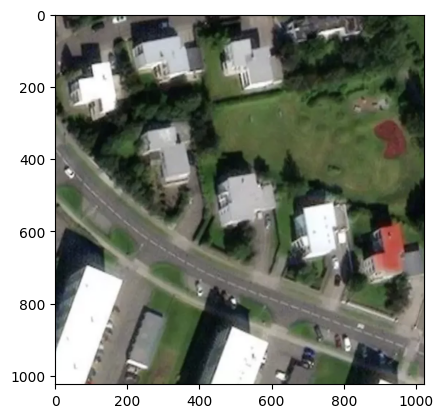

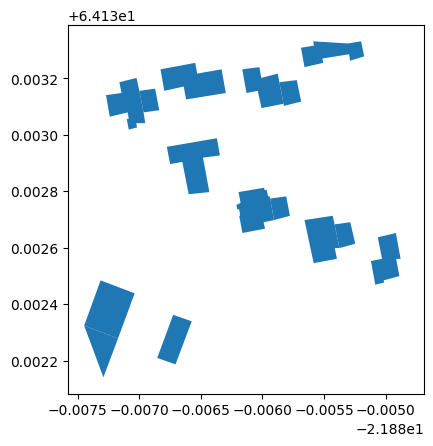

In [65]:
img = Image.open('/Users/002-nathan/Desktop/Envalys/gtm/' + str(hnit[0]) + '_' + str(hnit[1]) + '.png')
fig, ax = plt.subplots()
ax.imshow(img)
byggingar.plot()

## Lokaorð
Við erum með forrit sem sækir gervitunglamyndir og kort af staðsetningum bygginga á mjög nákvæman hátt. Þetta er allt sem við þurfum til að þjálfa gervigreindarlíkan.